<a href="https://colab.research.google.com/github/Annrrt/Modulo-6-Proyecto-2/blob/main/Copia_de_Copia_de_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Forma de los datos de entrenamiento: (28709, 48, 48)
Forma de las etiquetas de entrenamiento: (28709,)
Forma de los datos de prueba: (7178, 48, 48)
Forma de las etiquetas de prueba: (7178,)


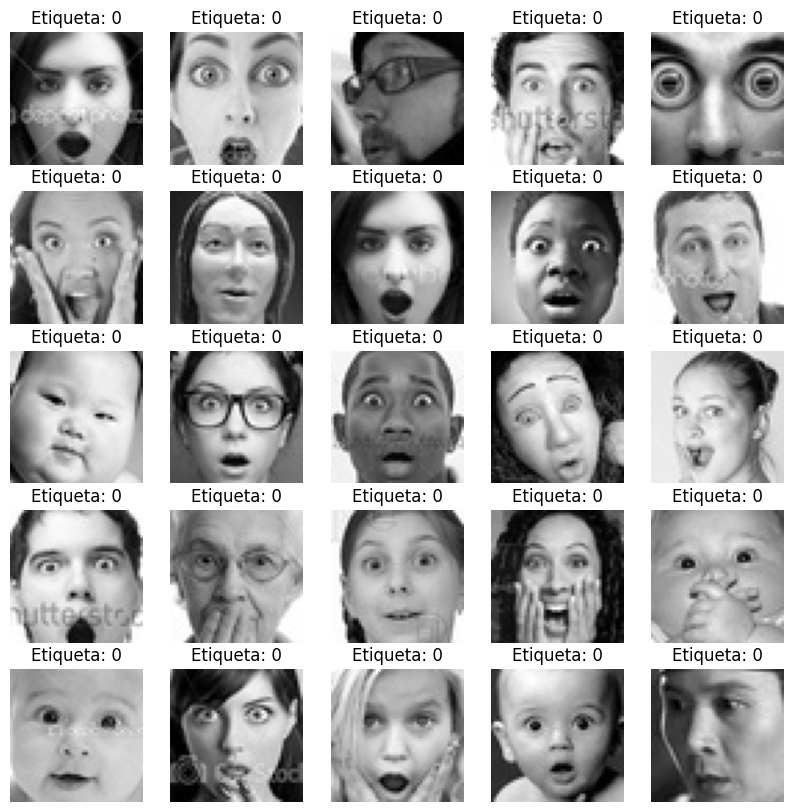

Nueva forma de X_train: (28709, 48, 48, 1)
Nueva forma de y_train: (28709, 10)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 46, 46, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       819,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 839,434 (3.20 MB)

 Trainable params: 839,434 (3.20 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
202/202 ━━━━━━━━━━━━━━━━━━━━ 76s 367ms/step - accuracy: 0.1772 - loss: 1.9629 - val_accuracy: 0.0000e+00 - val_loss: 1.7367
Epoch 2/10
202/202 ━━━━━━━━━━━━━━━━━━━━ 83s 372ms/step - accuracy: 0.1838 - loss: 1.8527 - val_accuracy: 0.0000e+00 - val_loss: 1.7982
Epoch 3/10
202/202 ━━━━━━━━━━━━━━━━━━━━ 80s 361ms/step - accuracy: 0.2019 - loss: 1.8290 - val_accuracy: 0.0401 - val_loss: 1.9004
Epoch 4/10
202/202 ━━━━━━━━━━━━━━━━━━━━ 82s 359ms/step - accuracy: 0.2704 - loss: 1.7551 - val_accuracy: 0.2212 - val_loss: 1.8503
Epoch 5/10
202/202 ━━━━━━━━━━━━━━━━━━━━ 75s 370ms/step - accuracy: 0.3062 - loss: 1.7076 - val_accuracy: 0.7008 - val_loss: 1.3426
Epoch 6/10
202/202 ━━━━━━━━━━━━━━━━━━━━ 75s 336ms/step - accuracy: 0.3193 - loss: 1.6980 - val_accuracy: 0.3542 - val_loss: 1.7252
Epoch 7/10
202/202 ━━━━━━━━━━━━━━━━━━━━ 71s 349ms/step - accuracy: 0.3312 - loss: 1.6764 - val_accuracy: 0.5573 - val_loss: 1.4089
Epoch 8/10
202/202 ━━━━━━━━━━━━━━━━━━━━ 82s 349ms/step - accuracy: 0.3365 -

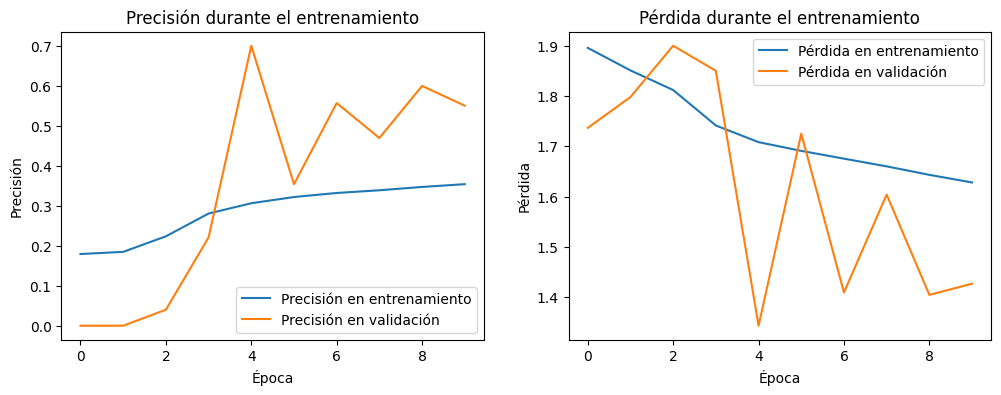

225/225 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step


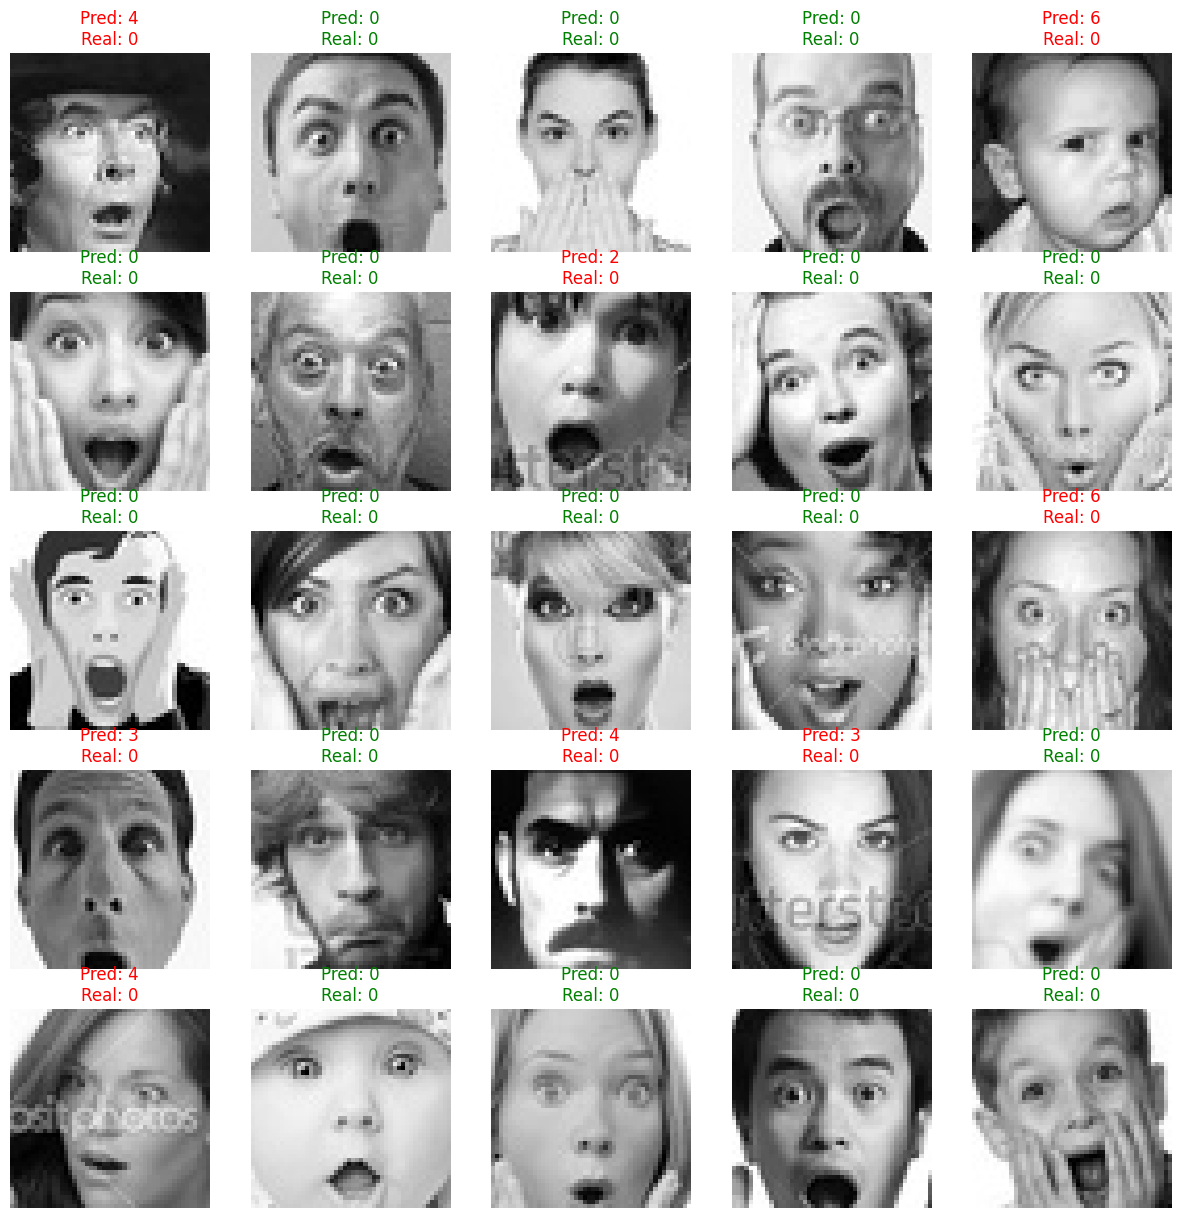

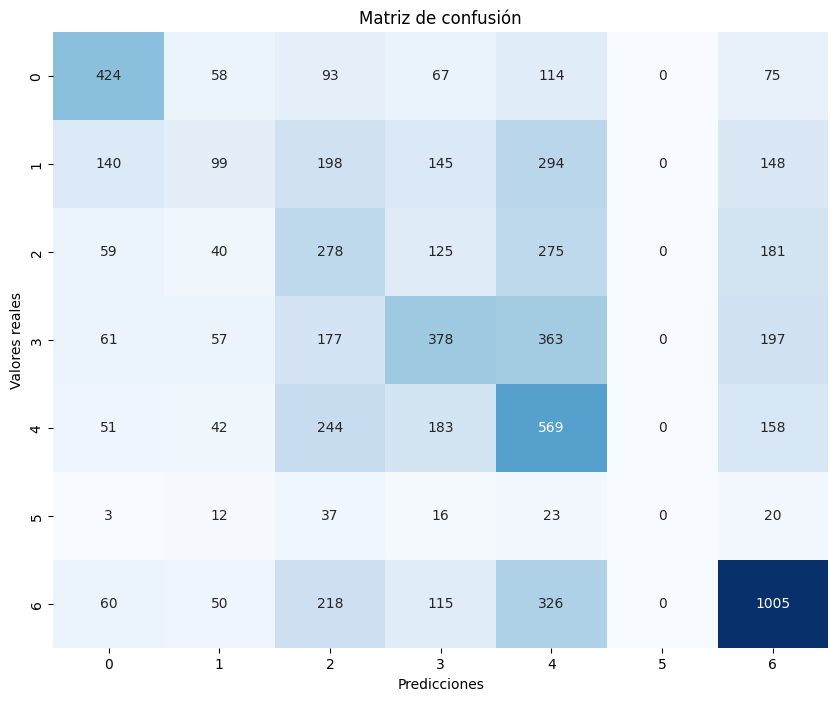

In [ ]:
# Importación de bibliotecas necesarias
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
import pandas as pd
import os
import cv2
import kagglehub

# Download latest version
data_directory = kagglehub.dataset_download("msambare/fer2013")

# Define a function to load images from the 'train' or 'test' directory
def load_images(directory):
    images = []
    labels = []
    for emotion, subdirectory in enumerate(os.listdir(directory)):
        emotion_directory = os.path.join(directory, subdirectory)
        for image_file in os.listdir(emotion_directory):
            image_path = os.path.join(emotion_directory, image_file)
            # Read the image and convert it to grayscale
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            # Resize the image to 48x48
            image = cv2.resize(image, (48, 48))
            # Normalize pixel values to the range [0, 1]
            image = image.astype('float32') / 255.0
            images.append(image)
            labels.append(emotion)
    return np.array(images), np.array(labels)

train_directory = os.path.join(data_directory, 'train')
X_train, y_train = load_images(train_directory)

# Load test images and labels
test_directory = os.path.join(data_directory, 'test')
X_test, y_test = load_images(test_directory)


# Mostrar información sobre el conjunto de datos
print("Forma de los datos de entrenamiento:", X_train.shape)  # (60000, 28, 28)
print("Forma de las etiquetas de entrenamiento:", y_train.shape)  # (60000,)
print("Forma de los datos de prueba:", X_test.shape)  # (10000, 28, 28)
print("Forma de las etiquetas de prueba:", y_test.shape)  # (10000,)

# Visualizar algunas imágenes de ejemplo
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Etiqueta: {y_train[i]}")
    plt.axis('off')
plt.show()

# 2. Preprocesamiento de datos

# Normalización: Escalar los valores de píxeles al rango [0, 1]
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Redimensionar las imágenes para incluir el canal (las CNN esperan (alto, ancho, canales))
X_train = np.expand_dims(X_train, -1)  # Forma: (60000, 28, 28, 1)
X_test = np.expand_dims(X_test, -1)  # Forma: (10000, 28, 28, 1)

# Convertir las etiquetas a one-hot encoding
# Ejemplo: 3 -> [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print("Nueva forma de X_train:", X_train.shape)
print("Nueva forma de y_train:", y_train.shape)

# 3. Definición de la arquitectura de la CNN

model = keras.Sequential([
    # Capa convolucional 1
    # 32 filtros de 3x3, función de activación ReLU
    # input_shape: (28, 28, 1) - imágenes en escala de grises
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)),

    # Capa de pooling (submuestreo) 1
    # Reducción espacial tomando el máximo en ventanas de 2x2
    layers.MaxPooling2D(pool_size=(2, 2)),

    # Capa convolucional 2
    # 64 filtros de 3x3, ReLU
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),

    # Capa de pooling 2
    layers.MaxPooling2D(pool_size=(2, 2)),

    # Aplanar los mapas de características para la capa densa
    layers.Flatten(),

    # Capa densa (fully connected) con 128 neuronas
    layers.Dense(128, activation='relu'),

    # Capa de dropout para regularización (evitar overfitting)
    # Apaga aleatoriamente el 20% de las neuronas durante el entrenamiento
    layers.Dropout(0.2),

    # Capa de salida con 10 neuronas (una por cada dígito)
    # Función de activación softmax para probabilidades
    layers.Dense(10, activation='softmax')
])

# Resumen del modelo
model.summary()

# 4. Compilación del modelo

# Configuración del proceso de entrenamiento
model.compile(
    optimizer='adam',  # Optimizador Adam (variante de descenso de gradiente)
    loss='categorical_crossentropy',  # Función de pérdida para clasificación multiclase
    metrics=['accuracy']  # Seguimos la precisión durante el entrenamiento
)

# 5. Entrenamiento del modelo

# Número de ejemplos procesados antes de actualizar los pesos
batch_size = 128

# Número de veces que iteramos sobre todo el conjunto de entrenamiento
epochs = 10

# Entrenamiento del modelo
history = model.fit(
    X_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.1  # Usamos el 10% de los datos de entrenamiento para validación
)

# 6. Evaluación del modelo

# Evaluación en el conjunto de prueba
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"\nPrecisión en el conjunto de prueba: {test_acc:.4f}")

# 7. Visualización del rendimiento

# Graficar precisión durante el entrenamiento
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Precisión en entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión en validación')
plt.title('Precisión durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()

# Graficar pérdida durante el entrenamiento
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Pérdida en entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida en validación')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

# 8. Predicciones y ejemplos

# Hacer predicciones en el conjunto de prueba
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test, axis=1)

# Mostrar algunas predicciones con sus imágenes
plt.figure(figsize=(15, 15))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(X_test[i].squeeze(), cmap='gray')
    color = 'green' if predicted_labels[i] == true_labels[i] else 'red'
    plt.title(f"Pred: {predicted_labels[i]}\nReal: {true_labels[i]}", color=color)
    plt.axis('off')
plt.show()

# Matriz de confusión para evaluación detallada
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.title('Matriz de confusión')
plt.show()

Forma de los datos de entrenamiento: (28709, 48, 48)
Forma de las etiquetas de entrenamiento: (28709,)
Forma de los datos de prueba: (7178, 48, 48)
Forma de las etiquetas de prueba: (7178,)


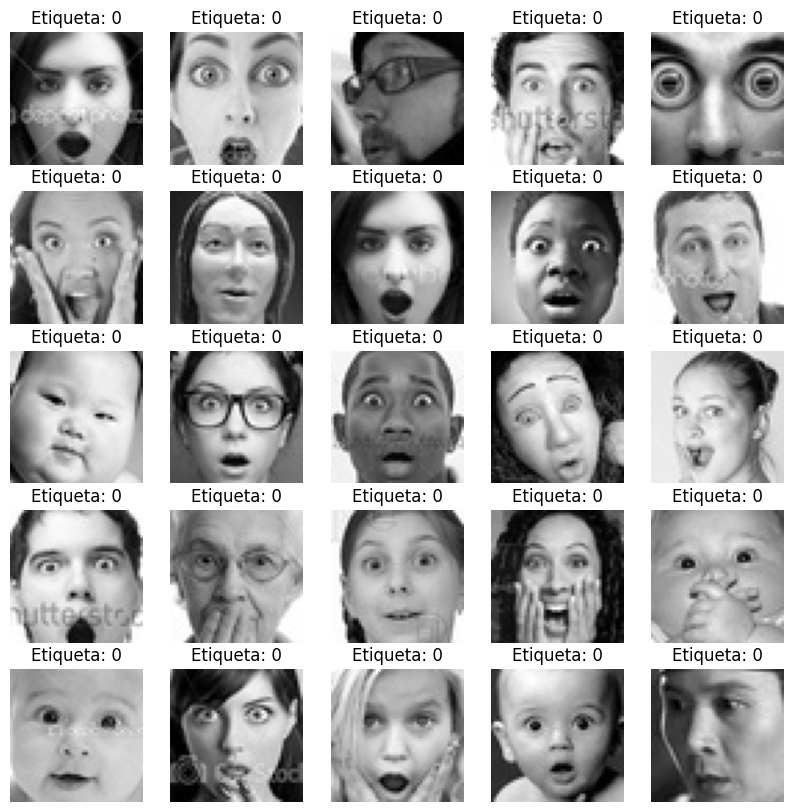

Nueva forma de X_train: (28709, 48, 48, 1)
Nueva forma de y_train: (28709, 7)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 46, 46, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 21, 21, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │     3,277,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,353,351 (12.79 MB)

 Trainable params: 3,353,351 (12.79 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
404/404 ━━━━━━━━━━━━━━━━━━━━ 181s 445ms/step - accuracy: 0.1802 - loss: 1.8558 - val_accuracy: 0.0000e+00 - val_loss: 1.8066
Epoch 2/15
404/404 ━━━━━━━━━━━━━━━━━━━━ 191s 419ms/step - accuracy: 0.1893 - loss: 1.8402 - val_accuracy: 0.0000e+00 - val_loss: 1.8218
Epoch 3/15
404/404 ━━━━━━━━━━━━━━━━━━━━ 170s 420ms/step - accuracy: 0.1868 - loss: 1.8425 - val_accuracy: 0.0000e+00 - val_loss: 1.7698
Epoch 4/15
404/404 ━━━━━━━━━━━━━━━━━━━━ 204s 426ms/step - accuracy: 0.1860 - loss: 1.8424 - val_accuracy: 0.0000e+00 - val_loss: 1.8019
Epoch 5/15
404/404 ━━━━━━━━━━━━━━━━━━━━ 199s 418ms/step - accuracy: 0.1939 - loss: 1.8377 - val_accuracy: 0.0000e+00 - val_loss: 1.7566
Epoch 6/15
404/404 ━━━━━━━━━━━━━━━━━━━━ 174s 431ms/step - accuracy: 0.1897 - loss: 1.8362 - val_accuracy: 0.0000e+00 - val_loss: 1.7411
Epoch 7/15
404/404 ━━━━━━━━━━━━━━━━━━━━ 170s 420ms/step - accuracy: 0.1882 - loss: 1.8403 - val_accuracy: 0.0000e+00 - val_loss: 1.7721
Epoch 8/15
404/404 ━━━━━━━━━━━━━━━━━━━━ 203s 422

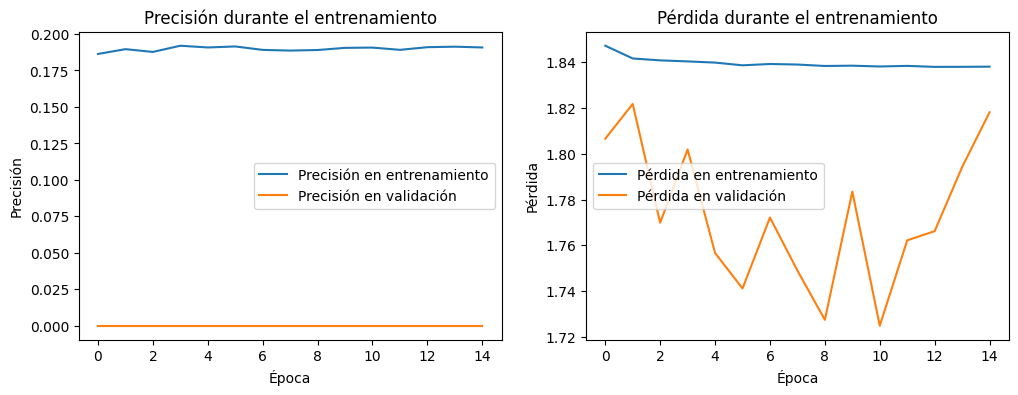

225/225 ━━━━━━━━━━━━━━━━━━━━ 14s 61ms/step


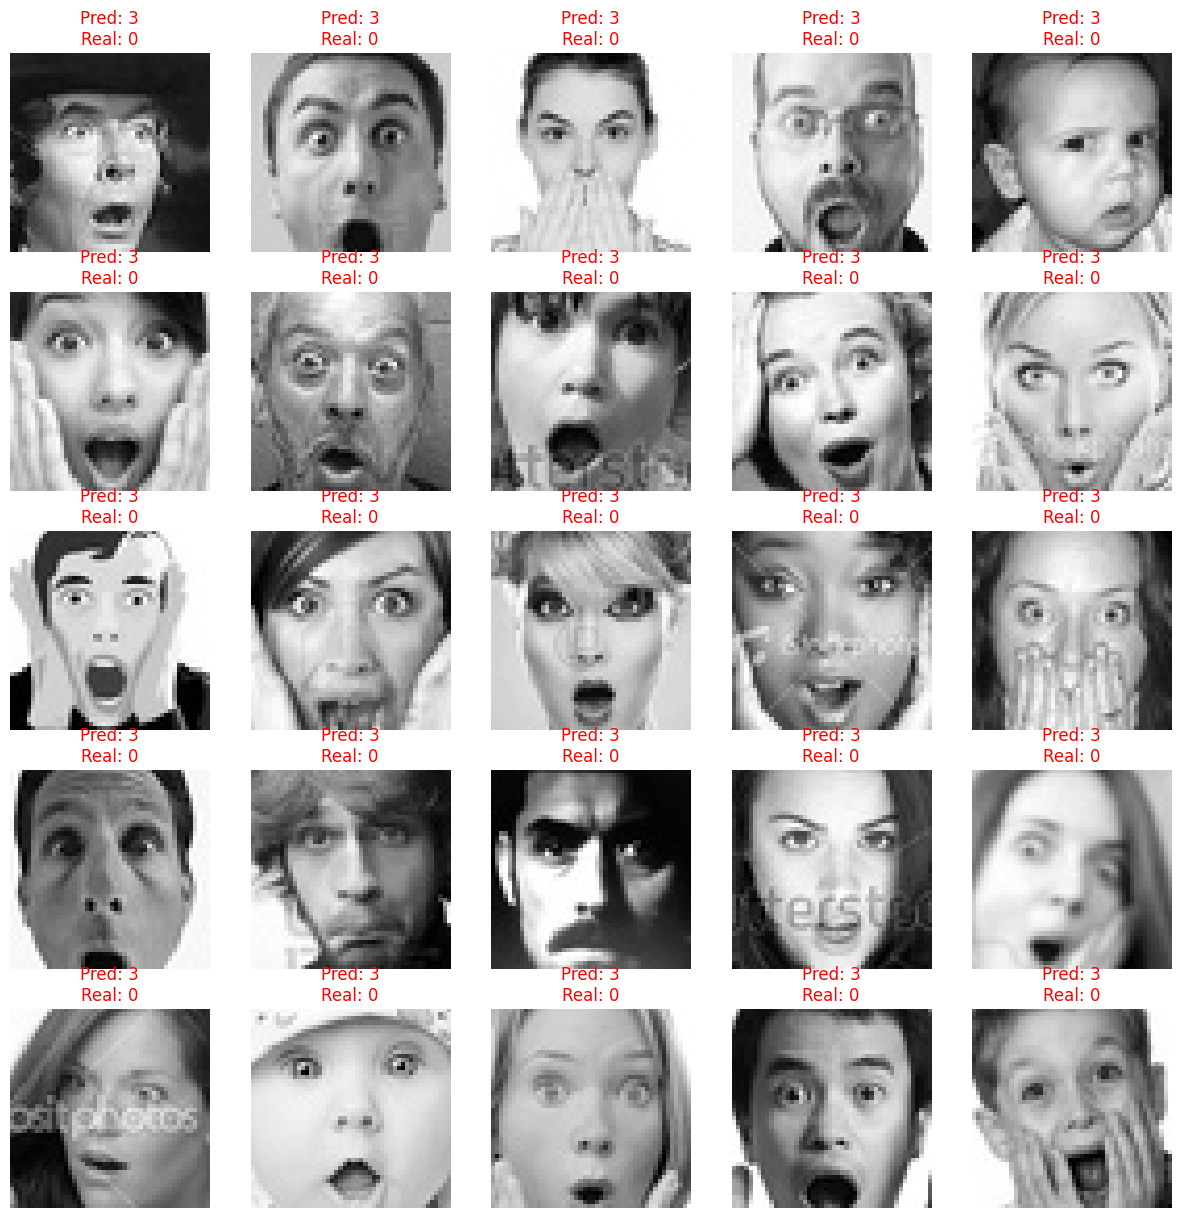

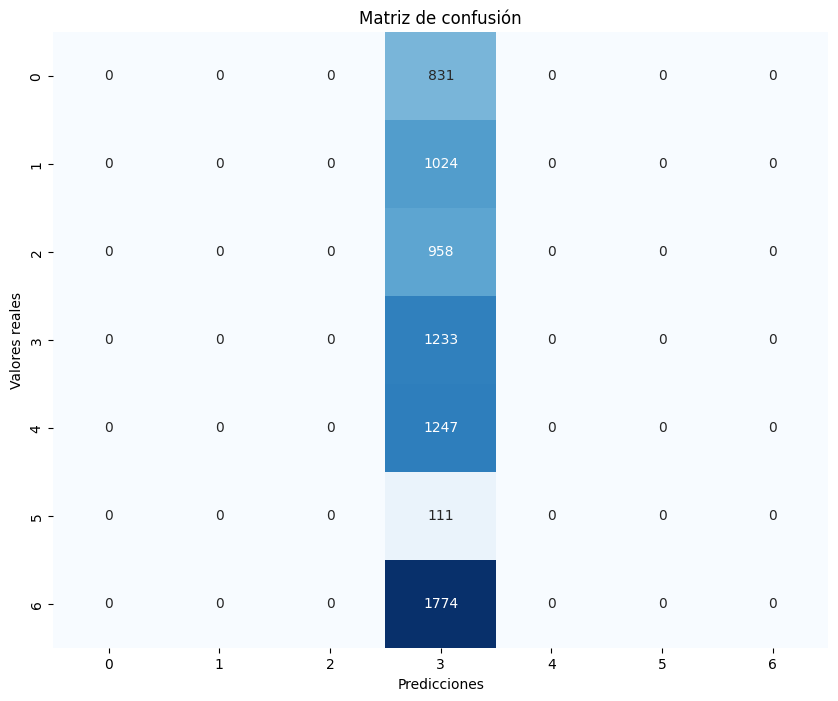

In [3]:
# Importación de bibliotecas necesarias
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
import pandas as pd
import os
import cv2
import kagglehub

# Download latest version
data_directory = kagglehub.dataset_download("msambare/fer2013")

# Define a function to load images from the 'train' or 'test' directory
def load_images(directory):
    images = []
    labels = []
    for emotion, subdirectory in enumerate(os.listdir(directory)):
        emotion_directory = os.path.join(directory, subdirectory)
        for image_file in os.listdir(emotion_directory):
            image_path = os.path.join(emotion_directory, image_file)
            # Read the image and convert it to grayscale
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            # Resize the image to 48x48
            image = cv2.resize(image, (48, 48))
            # Normalize pixel values to the range [0, 1]
            image = image.astype('float32') / 255.0
            images.append(image)
            labels.append(emotion)
    return np.array(images), np.array(labels)

train_directory = os.path.join(data_directory, 'train')
X_train, y_train = load_images(train_directory)

# Load test images and labels
test_directory = os.path.join(data_directory, 'test')
X_test, y_test = load_images(test_directory)


# Mostrar información sobre el conjunto de datos
print("Forma de los datos de entrenamiento:", X_train.shape)  # (60000, 28, 28)
print("Forma de las etiquetas de entrenamiento:", y_train.shape)  # (60000,)
print("Forma de los datos de prueba:", X_test.shape)  # (10000, 28, 28)
print("Forma de las etiquetas de prueba:", y_test.shape)  # (10000,)

# Visualizar algunas imágenes de ejemplo
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Etiqueta: {y_train[i]}")
    plt.axis('off')
plt.show()

# 2. Preprocesamiento de datos

# Normalización: Escalar los valores de píxeles al rango [0, 1]
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Redimensionar las imágenes para incluir el canal (las CNN esperan (alto, ancho, canales))
X_train = np.expand_dims(X_train, -1)  # Forma: (60000, 28, 28, 1)
X_test = np.expand_dims(X_test, -1)  # Forma: (10000, 28, 28, 1)

# Convertir las etiquetas a one-hot encoding
# Ejemplo: 3 -> [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
y_train = to_categorical(y_train, 7)
y_test = to_categorical(y_test, 7)

print("Nueva forma de X_train:", X_train.shape)
print("Nueva forma de y_train:", y_train.shape)

# 3. Definición de la arquitectura de la CNN

model = keras.Sequential([
    # Capa convolucional 1
    # 32 filtros de 3x3, función de activación ReLU
    # input_shape: (28, 28, 1) - imágenes en escala de grises
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)),

    # Capa de pooling (submuestreo) 1
    # Reducción espacial tomando el máximo en ventanas de 2x2
    layers.MaxPooling2D(pool_size=(2, 2)),

    # Capa convolucional 2
    # 64 filtros de 3x3, ReLU
    layers.Conv2D(128, kernel_size=(3, 3), activation='relu'),

    # Capa de pooling 2
    layers.MaxPooling2D(pool_size=(2, 2)),

    # Aplanar los mapas de características para la capa densa
    layers.Flatten(),

    # Capa densa (fully connected) con 128 neuronas
    layers.Dense(256, activation='relu'),

    # Capa de dropout para regularización (evitar overfitting)
    # Apaga aleatoriamente el 20% de las neuronas durante el entrenamiento
    layers.Dropout(0.2),

    # Capa de salida con 10 neuronas (una por cada dígito)
    # Función de activación softmax para probabilidades
    layers.Dense(7, activation='softmax')
])

# Resumen del modelo
model.summary()

# 4. Compilación del modelo

# Configuración del proceso de entrenamiento
model.compile(
    optimizer='adam',  # Optimizador Adam (variante de descenso de gradiente)
    loss='categorical_crossentropy',  # Función de pérdida para clasificación multiclase
    metrics=['accuracy']  # Seguimos la precisión durante el entrenamiento
)

# 5. Entrenamiento del modelo

# Número de ejemplos procesados antes de actualizar los pesos
batch_size = 64

# Número de veces que iteramos sobre todo el conjunto de entrenamiento
epochs = 15

# Entrenamiento del modelo
history = model.fit(
    X_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.1  # Usamos el 10% de los datos de entrenamiento para validación
)

# 6. Evaluación del modelo

# Evaluación en el conjunto de prueba
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"\nPrecisión en el conjunto de prueba: {test_acc:.4f}")

# 7. Visualización del rendimiento

# Graficar precisión durante el entrenamiento
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Precisión en entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión en validación')
plt.title('Precisión durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()

# Graficar pérdida durante el entrenamiento
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Pérdida en entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida en validación')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

# 8. Predicciones y ejemplos

# Hacer predicciones en el conjunto de prueba
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test, axis=1)

# Mostrar algunas predicciones con sus imágenes
plt.figure(figsize=(15, 15))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(X_test[i].squeeze(), cmap='gray')
    color = 'green' if predicted_labels[i] == true_labels[i] else 'red'
    plt.title(f"Pred: {predicted_labels[i]}\nReal: {true_labels[i]}", color=color)
    plt.axis('off')
plt.show()

# Matriz de confusión para evaluación detallada
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.title('Matriz de confusión')
plt.show()